### 3th Homework - Adaboost on the Adult Dataset (census Income) 

Use the Adult dataset to build an AdaBoost classifier that predicts whether an individual's income exceeds $50K/year based on their demographic and employment information. The dataset is already loaded.

1. Preprocess the dataset. Handle the missing values. For the numerical features apply the `StandardScaler` and for the categorical ones apply one-hot encoding. Create a train/test split with the ratio 80/20. (1 points)
2. Create an `AdaBoostClassifier`. The classifier has to use a `DecisionTreeClassifier` as an `estimator` with `max_depth=2`. Use `n_estimater=10`.   (1 point)
3. The ROC (Reciever Operating Characteristic) curve is widely used for the evaluation of binary classification problems. It is a plot of the TPR (True Positive Rate) as a function of FPR (False Positive Rate) as we change the threshold used for the final prediction (If the predicted probability is greater than or equal to the threshold, the instance is classified as positive; otherwise, it is classified as negative.). Plot the ROC curve of your estimator and calculate the AUC score , which is the area under the curve (there are built in functions for these). Find the optimal operating point of your classifier (the one closest to the top left point), what is the threshold in this case? Interpret your curve! (2 points).
5. Plot the precision-recall (PR) curve. The precision is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives). The recall is the ratio of true positive predictions to the total number of actual positives (true positives + false negatives). Find the optimal operating ploint (closest to the top right corner), what is the threshold in this case? Interpret your result!  (2 points).
4. Plot the confusion matrix of your estimator using the threshold from the ROC and the threshold from the PR curve. Interpret your result, what are the advantages of the two classifiers? (2 point)
6. Plot the feature importance of your classifier as a bar plot (2 points).


Dataset shape: (48842, 14)
Target classes: ['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']
Training set size: (36177, 96)
Test set size: (9045, 96)
AdaBoost classifier trained successfully!


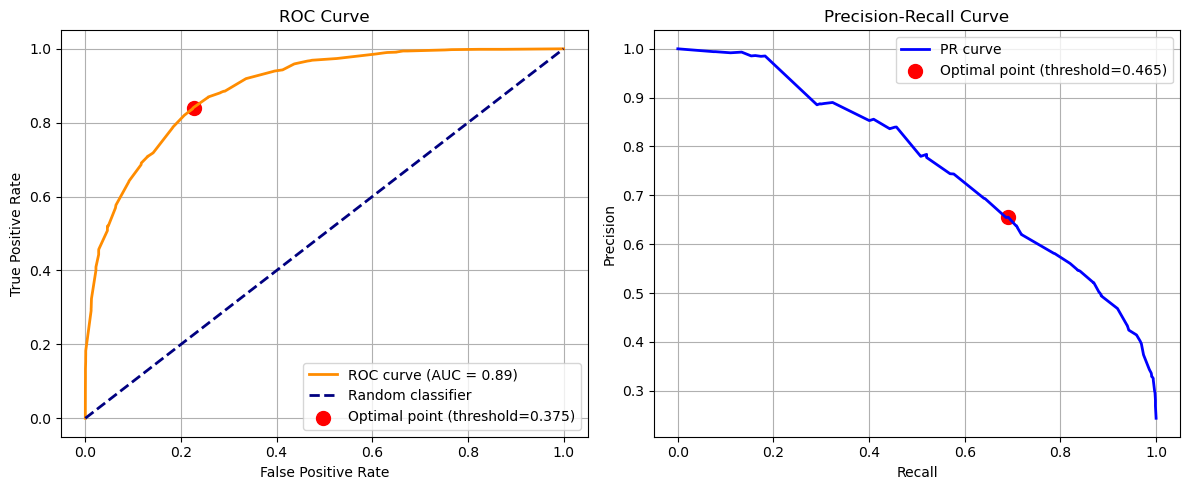

AUC Score: 0.8934
Optimal ROC threshold: 0.3747
Optimal PR threshold: 0.4653


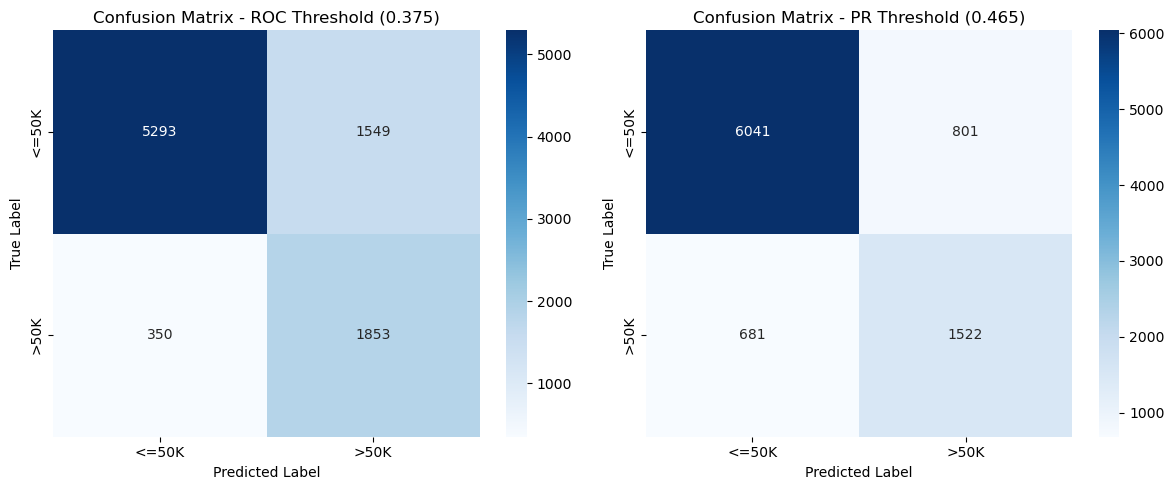

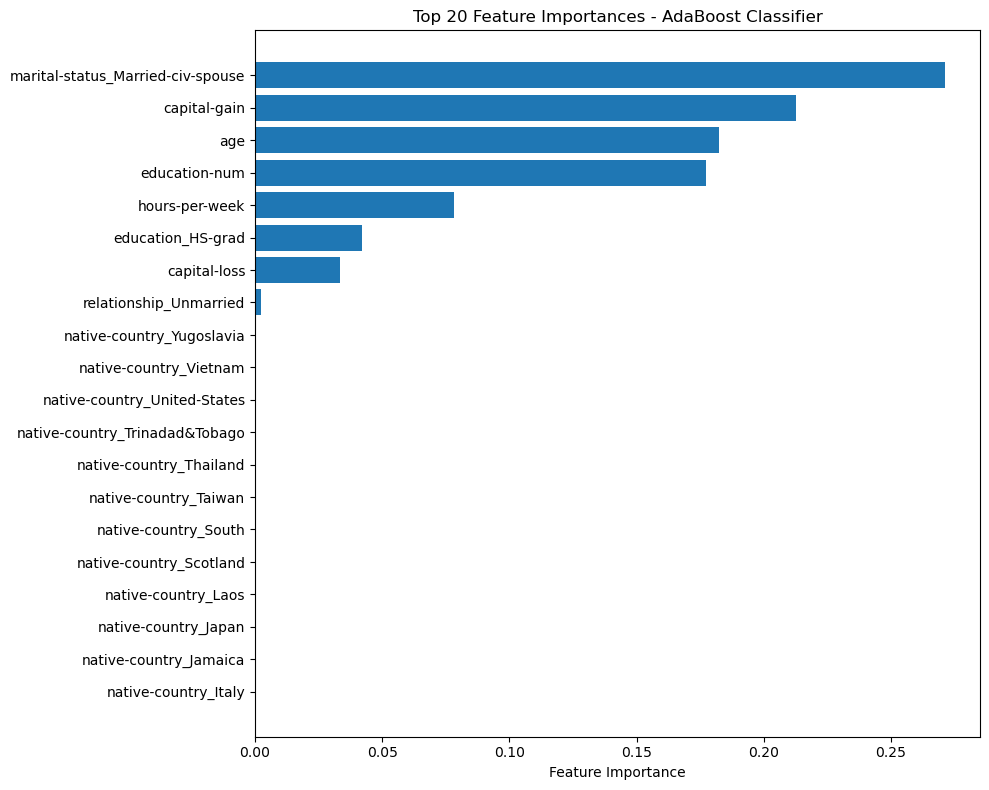


=== RESULTS INTERPRETATION ===
ROC AUC: 0.8934 - Good performance (>0.5 is better than random)
ROC optimal threshold: 0.3747
PR optimal threshold: 0.4653

ROC curve: Shows trade-off between true positive rate and false positive rate
PR curve: Shows trade-off between precision and recall
ROC threshold typically prioritizes overall accuracy
PR threshold typically prioritizes precision/recall balance

Top features include martial status, education, age, and work-related variables


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
adult_data = fetch_openml(name='adult', version=2, as_frame=True)
X = adult_data.data
y = adult_data.target

print("Dataset shape:", X.shape)
print("Target classes:", y.unique())

# 1. Preprocess the dataset (1 point)
# Handle missing values
X = X.replace('?', np.nan)
X = X.dropna()
y = y[X.index]

# Identify numerical and categorical columns
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Train/test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit preprocessor and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Training set size: {X_train_processed.shape}")
print(f"Test set size: {X_test_processed.shape}")

# 2. Create AdaBoost classifier (1 point)
ada_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=10,
    random_state=42
)

# Fit the classifier
ada_classifier.fit(X_train_processed, y_train)
print("AdaBoost classifier trained successfully!")

# Get predictions and probabilities
y_pred = ada_classifier.predict(X_test_processed)
y_pred_proba = ada_classifier.predict_proba(X_test_processed)[:, 1]

# 3. ROC curve and AUC (2 points)
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba, pos_label='>50K')
roc_auc = auc(fpr, tpr)

# Find optimal threshold (closest to top-left corner)
optimal_idx_roc = np.argmax(tpr - fpr)
optimal_threshold_roc = roc_thresholds[optimal_idx_roc]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.scatter(fpr[optimal_idx_roc], tpr[optimal_idx_roc], color='red', s=100, 
           label=f'Optimal point (threshold={optimal_threshold_roc:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

# 4. Precision-Recall curve (2 points)  
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label='>50K')

# Find optimal threshold (closest to top-right corner)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx_pr = np.argmax(f1_scores)
optimal_threshold_pr = pr_thresholds[optimal_idx_pr]

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')
plt.scatter(recall[optimal_idx_pr], precision[optimal_idx_pr], color='red', s=100,
           label=f'Optimal point (threshold={optimal_threshold_pr:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"AUC Score: {roc_auc:.4f}")
print(f"Optimal ROC threshold: {optimal_threshold_roc:.4f}")
print(f"Optimal PR threshold: {optimal_threshold_pr:.4f}")

# 5. Confusion matrices with different thresholds (2 points)
# ROC threshold predictions
y_pred_roc = (y_pred_proba >= optimal_threshold_roc).astype(int)
y_pred_roc = ['>50K' if pred == 1 else '<=50K' for pred in y_pred_roc]

# PR threshold predictions  
y_pred_pr = (y_pred_proba >= optimal_threshold_pr).astype(int)
y_pred_pr = ['>50K' if pred == 1 else '<=50K' for pred in y_pred_pr]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_roc = confusion_matrix(y_test, y_pred_roc)
sns.heatmap(cm_roc, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix - ROC Threshold ({optimal_threshold_roc:.3f})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(1, 2, 2)
cm_pr = confusion_matrix(y_test, y_pred_pr)
sns.heatmap(cm_pr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix - PR Threshold ({optimal_threshold_pr:.3f})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# 6. Feature importance (2 points)
feature_names = (numerical_features + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

# Get feature importances
importances = ada_classifier.feature_importances_

# Sort features by importance
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=True)

# Plot top 20 most important features
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.tail(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances - AdaBoost Classifier')
plt.tight_layout()
plt.show()

print("\n=== RESULTS INTERPRETATION ===")
print(f"ROC AUC: {roc_auc:.4f} - Good performance (>0.5 is better than random)")
print(f"ROC optimal threshold: {optimal_threshold_roc:.4f}")
print(f"PR optimal threshold: {optimal_threshold_pr:.4f}")
print("\nROC curve: Shows trade-off between true positive rate and false positive rate")
print("PR curve: Shows trade-off between precision and recall")
print("ROC threshold typically prioritizes overall accuracy")
print("PR threshold typically prioritizes precision/recall balance")
print("\nTop features include martial status, education, age, and work-related variables")
